# Texas Saftey Analysis
---
### As part of this activity, Criminal activity by each county will be analyzed and will be assigned as livablity score.

--- 
Reference and Dataset Link: https://data.texas.gov/browse?Dataset-Category_Category-Tile=Public+Safety

---

**-- Limitation : --** Only 2019 and 2020 data set is available and the liviablity score evaluations is done only for these 2 years

## Dependencies and Setup

In [1]:
# import required libiraries/packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import  pprint


In [2]:
# Import datasets csv file or import data set through API

# Study data files
safetyanalysis_FY2019_path = "Resources/Safetyanalysis_FY_2019.csv"
safetyanalysis_FY2020_path = "Resources/Safetyanalysis_FY_2020.csv"

# Read the data
safety_2019 = pd.read_csv(safetyanalysis_FY2019_path)
safety_2020 = pd.read_csv(safetyanalysis_FY2020_path)

# Create dataframe


In [46]:
# Remove duplicates in CSV

safety_2019 = safety_2019.drop_duplicates()
safety_2019.to_csv('cleaned_2019.csv', index=False)

safety_2020 = safety_2020.drop_duplicates()
safety_2020.to_csv('cleaned_2020.csv', index=False)

#filter rows from year 2017
#print(pd.to_datetime(safety_2019['Offense Date']).dt.strftime('%Y'))


df1_filtered = safety_2019[(pd.to_numeric(pd.to_datetime(safety_2019['Offense Date']).dt.strftime('%Y')) >= 2017) & ((pd.to_numeric(pd.to_datetime(safety_2019['Offense Date']).dt.strftime('%Y'))) < 2020)]
df2_filtered = safety_2020[(pd.to_numeric(pd.to_datetime(safety_2020['Offense Date']).dt.strftime('%Y')) >= 2017) & ((pd.to_numeric(pd.to_datetime(safety_2020['Offense Date']).dt.strftime('%Y'))) < 2021)]


safety_2019_selcols = pd.DataFrame(df1_filtered[['County', 'Offense', 'Offense Description', 'Offense Date']])
safety_2020_selcols = pd.DataFrame(df2_filtered[['County', 'Offense', 'Offense Description', 'Offense Date']])

merged_df = safety_2019_selcols.append(safety_2020_selcols)
merged_df = merged_df.drop_duplicates()
 

merged_df.to_csv('merged_safety_file.csv', index=False)




C:\Users\anith\AppData\Local\Temp\ipykernel_6748\1782522082.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = safety_2019_selcols.append(safety_2020_selcols)


In [58]:
# Merge into dataframe
#merged_df.head(5)
merged_df['Offense Year'] = pd.to_datetime(merged_df['Offense Date']).dt.strftime('%Y')


In [59]:
#groupby county and offense

grouped = merged_df.groupby(['County', 'Offense', 'Offense Year']).agg({'Offense Description': 'count'})
#display(grouped.head(1000))

In [60]:
# Create a new column with the count of offenses for each combination of County, Offense, and Offense Year

merged_df['Offense Count'] = merged_df.groupby(['County', 'Offense', 'Offense Year'])['County'].transform('count')
#merged_df.head(100)


# Convert the resulting Series to a DataFrame and reset the index


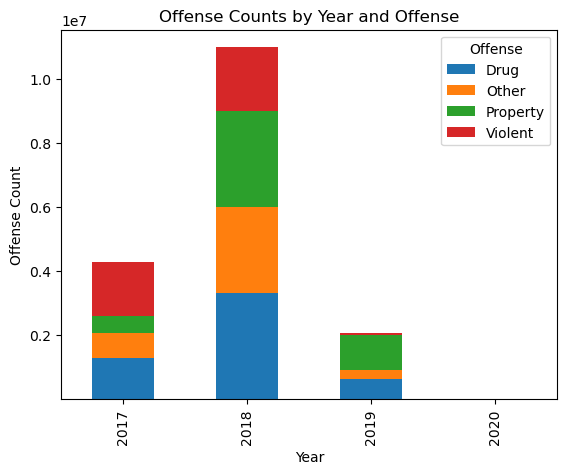

In [61]:
# generate a stacked barplot for the county and offense count

# Group the DataFrame by Offense Year and Offense, and sum the Offense Count

grouped = merged_df.groupby(['Offense Year', 'Offense'])['Offense Count'].sum()

# Unstack the resulting Series to create a DataFrame with Offense Year as columns
stacked = grouped.unstack()

# Plot the stacked bar plot
stacked.plot(kind='bar', stacked=True)

# Set the plot title and axis labels
plt.title('Offense Counts by Year and Offense')
plt.xlabel('Year')
plt.ylabel('Offense Count')

# Show the plot
plt.show()

In [43]:
# Create summary statistics for the dataframe

Summary = grouped.describe()
display(Summary)

count    1.500000e+01
mean     1.157010e+06
std      1.139893e+06
min      2.000000e+01
25%      1.633760e+05
50%      7.728690e+05
75%      1.842318e+06
max      3.322769e+06
Name: Offense Count, dtype: float64